# Namita Bhatt, 03801192022, B.Tech AI/ML

INTRODUCTION: I have taken a popular video streaming platform, specialized in educational content, where creators publish online video tutorials and lessons about any topic, from speaking a new language to cooking to learning to play a musical instrument...

My next goal is to leverage ML-driven solutions to analyze and make predictions about the content creator's subscribers and improve their marketing strategy around attracting new subscribers and retaining current ones. 

This project uses machine learning to predict subscribers likely to churn and find customer segments.
This may help the platform find interesting usage patterns to build subscriber personas in future marketing plans!

PRE-REQUISITES

In [4]:
# Import the necessary modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

# Specify the file path of your CSV file
file_path = "AZWatch_subscribers.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Separate predictor variables from class label
X = df.drop(['subscriber_id','subscription_status'], axis=1)
y = df.subscription_status

# Split intro training and test sets (20% test)
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=.2, random_state=42)

DATA UNDERSTANDING

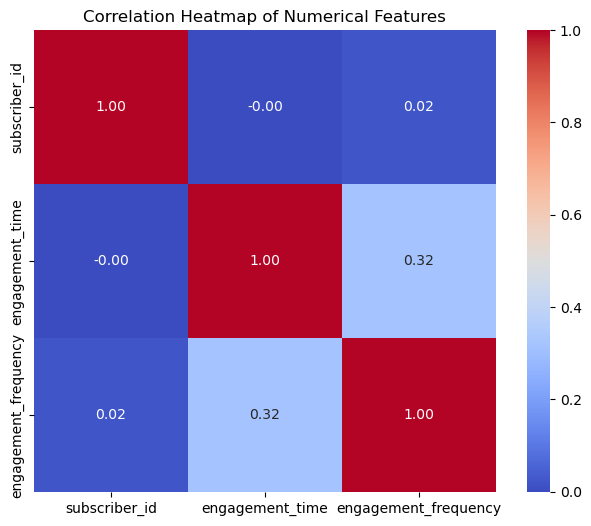

In [8]:
# Visualize correlation heatmap of numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

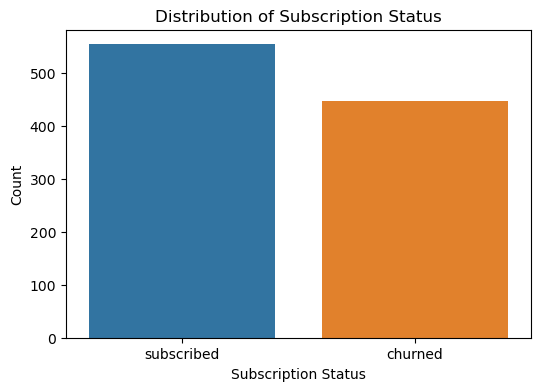

In [9]:
# Visualize distribution of subscription status
plt.figure(figsize=(6, 4))
sns.countplot(x='subscription_status', data=df)
plt.title('Distribution of Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.show()

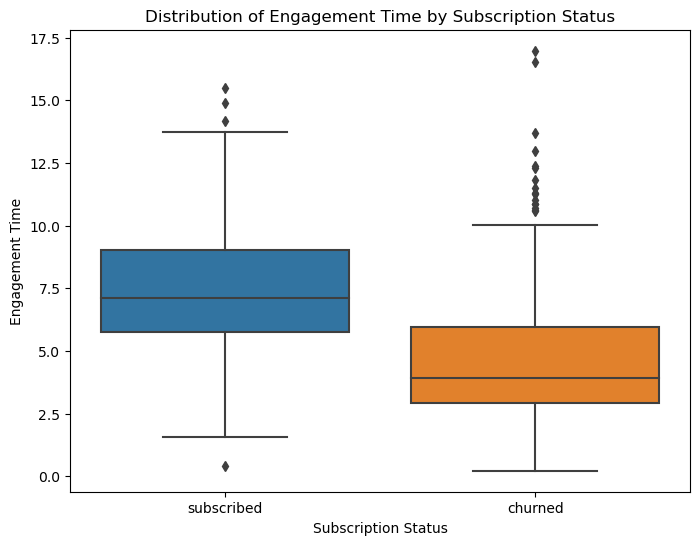

In [10]:
# Visualize distribution of engagement time by subscription status
plt.figure(figsize=(8, 6))
sns.boxplot(x='subscription_status', y='engagement_time', data=df)
plt.title('Distribution of Engagement Time by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Engagement Time')
plt.show()

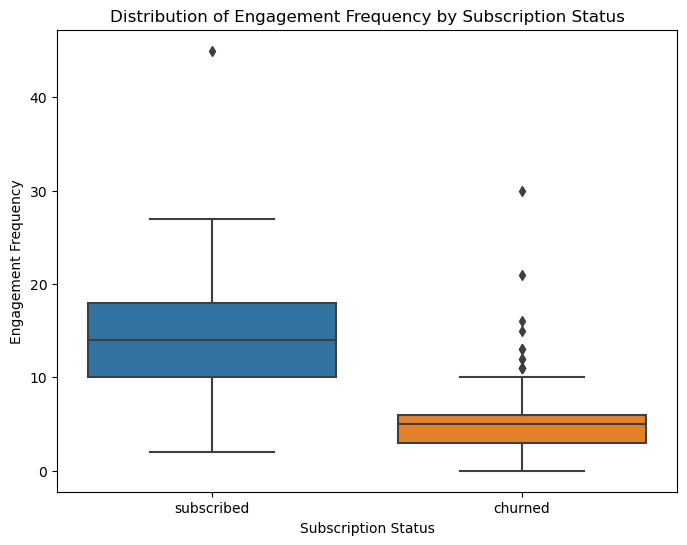

In [11]:
# Visualize distribution of engagement frequency by subscription status
plt.figure(figsize=(8, 6))
sns.boxplot(x='subscription_status', y='engagement_frequency', data=df)
plt.title('Distribution of Engagement Frequency by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Engagement Frequency')
plt.show()

DATA PREPARATION

In [12]:
# Apply One Hot Encoding on the categorical attribute: age_group
X_train_prepared = pd.get_dummies(X_train, columns=['age_group'])

In [13]:
# Apply the same one hot encoding transformation on the test data
X_test_prepared = pd.get_dummies(X_test, columns=['age_group'])

In [15]:
# Variable treatment: Handle missing values (if any)
# For demonstration, let's assume filling missing values with median for numerical columns
df.fillna(df.median(numeric_only=True), inplace=True)

In [16]:
# Separate predictor variables from class label
X = df.drop(['subscriber_id','subscription_status'], axis=1)
y = df.subscription_status

In [17]:
# Feature creation: Create new features if necessary
# For demonstration, let's create a new feature representing the total engagement
X['total_engagement'] = X['engagement_time'] * X['engagement_frequency']

In [24]:
# Feature selection: Select top K features using chi-square test
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func=chi2, k=5)
X_train_selected = selector.fit_transform(X_train_prepared, y_train)
X_test_selected = selector.transform(X_test_prepared)

selected_features_indices = selector.get_support(indices=True)
selected_features_names = X_train_prepared.columns[selected_features_indices]
print("Selected Features:", selected_features_names)

Selected Features: Index(['engagement_time', 'engagement_frequency', 'age_group_18-34',
       'age_group_35 and over', 'age_group_under 18'],
      dtype='object')


In [ ]:
MODELLING

In [25]:
# LOGISTIC REGRESSION CLASSIFIER

# Train a logistic regression classifier for subscriber churn prediction
model1 = LogisticRegression()
model1.fit(X_train_prepared, y_train)

LogisticRegression()

In [26]:
# Calculate accuracy score of predictions on test set
score = model1.score(X_test_prepared, y_test)
print("\nLogistic regression accuracy score: ", score)


Logistic regression accuracy score:  0.925


In [27]:
# DECISION TREE CLASSIFIER

# Train a decision tree classifier for subscriber churn prediction
model2 = DecisionTreeClassifier(max_depth=3, criterion="gini")
model2.fit(X_train_prepared, y_train)


DecisionTreeClassifier(max_depth=3)

In [28]:
# Calculate decision tree's accuracy score of predictions on test set

score = model2.score(X_test_prepared, y_test)
print("\nDecision tree accuracy score: ", score)


Decision tree accuracy score:  0.92


In [29]:
# RANDOM FOREST ENSEMBLE

# Train a random forest ensemble classifier for subscriber churn prediction
model3 = RandomForestClassifier(n_estimators = 10, max_depth=3)
model3.fit(X_train_prepared, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [30]:
# Calculate ensemble's accuracy score of predictions on test set
score = model3.score(X_test_prepared, y_test)
print("\nRandom Forest accuracy score: ", score)


Random Forest accuracy score:  0.895


In [35]:
# SUBSCRIBER SEGMENTATION
#using Hierarchical Clustering
segmentation = X.drop(['age_group'], axis=1)

In [36]:
# Scale the two numerical data attributes
scaler = StandardScaler()
scaler.fit(segmentation)
segmentation_normalized = scaler.transform(segmentation)

In [38]:
# Perform hierarchical clustering with 3 clusters
# Import AgglomerativeClustering from sklearn.cluster
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=3)
cluster_labels = agglomerative.fit_predict(segmentation_normalized)

In [39]:
# Add cluster labels as a new attribute in the dataset before scaling
segmentation["cluster_id"] = cluster_labels

# Analyze average feature values and counts per cluster
analysis = segmentation.groupby(['cluster_id']).agg({
    'engagement_time': ['mean'],
    'engagement_frequency': ['mean']
}).round(0)
print(analysis)

           engagement_time engagement_frequency
                      mean                 mean
cluster_id                                     
0                      7.0                 17.0
1                      4.0                  5.0
2                     10.0                  7.0


In [47]:
# Apply k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1, n_init=10)
kmeans.fit_predict(segmentation_normalized)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1,
       0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1,
       1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 0, 0,
       0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 2, 1, 1, 0, 2,
       2, 1, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 2, 2,
       1, 2, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0,
       1, 0, 2, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1,
       1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       2, 0, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0,
       0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 2,
       2, 2, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 1, 2, 2, 1,
       0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 2,
       2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0,

In [48]:
# Add cluster labels as a new attribute in the dataset before scaling
segmentation["cluster_id"] = kmeans.labels_

In [49]:
# Analyze average feature values and counts per cluster
analysis = segmentation.groupby(['cluster_id']).agg({
    'engagement_time': ['mean'],
    'engagement_frequency':['mean']
}).round(0)
analysis

,engagement_time,engagement_frequency
,mean,mean
cluster_id,,
0,8.0,8.0
1,4.0,6.0
2,8.0,18.0


EVALUATION

In [56]:
# Import the necessary modules for evaluation
from sklearn.metrics import confusion_matrix, classification_report\

# Convert X_test_selected into a DataFrame with appropriate column names
X_test_selected_df = pd.DataFrame(X_test_selected, columns=X_train_prepared.columns[selector.get_support()])

In [57]:
# Evaluate logistic regression model
y_pred_lr = model1.predict(X_test_selected_df)
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix - Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

     churned       0.91      0.92      0.92        91
  subscribed       0.94      0.93      0.93       109

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200

Confusion Matrix - Logistic Regression:
[[ 84   7]
 [  8 101]]


In [58]:
# Evaluate decision tree model
y_pred_dt = model2.predict(X_test_selected_df)
print("Classification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix - Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))

Classification Report - Decision Tree:
              precision    recall  f1-score   support

     churned       0.94      0.88      0.91        91
  subscribed       0.90      0.95      0.93       109

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

Confusion Matrix - Decision Tree:
[[ 80  11]
 [  5 104]]


In [60]:
# Evaluate random forest model

# Convert X_test_selected into a DataFrame with appropriate column names
X_test_selected_df = pd.DataFrame(X_test_selected, columns=X_train_prepared.columns[selector.get_support()])

y_pred_rf = model3.predict(X_test_selected_df)
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix - Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Classification Report - Random Forest:
              precision    recall  f1-score   support

     churned       0.84      0.95      0.89        91
  subscribed       0.95      0.85      0.90       109

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200

Confusion Matrix - Random Forest:
[[86  5]
 [16 93]]



Inertia - KMeans Clustering: 980.3230962165914


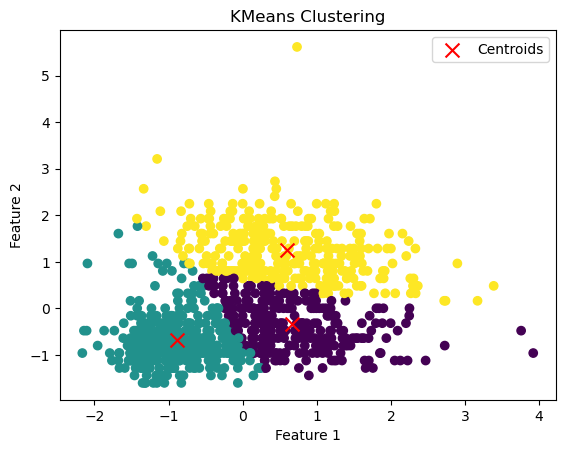

In [61]:
# Evaluate KMeans clustering
#use inertia as a metric
inertia = kmeans.inertia_
print("\nInertia - KMeans Clustering:", inertia)

plt.scatter(segmentation_normalized[:, 0], segmentation_normalized[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [62]:
# Evaluate hierarchical clustering

from sklearn.metrics import silhouette_score

# using silhouette score as a metric
silhouette_score_hierarchical = silhouette_score(segmentation_normalized, kmeans.labels_)
print("\nSilhouette Score - Hierarchical Clustering:", silhouette_score_hierarchical)


Silhouette Score - Hierarchical Clustering: 0.40732305453240775
